In [71]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt

#Data Set

In [4]:
messages=pd.read_csv('/content/Spam dataset.csv',)

In [5]:
messages.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


#Data Cleaning

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [10]:
messages['Message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [11]:
messages['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [12]:
df=messages['Message']

In [13]:
processed = df.str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b',
                                 'emailaddr')
processed = processed.str.replace(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)',
                                  'httpaddr')
processed = processed.str.replace(r'£|\$', 'moneysymb')    
processed = processed.str.replace(
    r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
    'phonenumbr')    
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

In [14]:
processed = processed.str.replace(r'[^\w\d\s]', ' ')
processed = processed.str.replace(r'\s+', ' ')
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [15]:
processed = processed.str.lower()

#Data Processing

In [16]:
spams=' '.join (messages['Message'])

In [ ]:
nltk.regexp_tokenize(spams,r'[A-Z]\w+')

In [26]:
filtered_tokens=[]
for token in spams.split():
  if token not in stop_words:
    word=re.sub(r'[!"#\$\%\&\'()*+,-./:;<=>?@[\\]^_`{|}~]+','',token)
    if word != '':
      filtered_tokens.append(word)

In [ ]:
filtered_tokens

#Removing stop words

In [28]:
stop_words = nltk.corpus.stopwords.words('english')

In [29]:
processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in set(stop_words))
)

#Stemming

In [30]:
porter = nltk.PorterStemmer()
processed = processed.apply(lambda x: ' '.join(
    porter.stem(term) for term in x.split())
)

In [31]:
def preprocess_text(messy_string):
    assert(type(messy_string) == str)
    cleaned = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', messy_string)
    cleaned = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr',
                     cleaned)
    cleaned = re.sub(r'£|\$', 'moneysymb', cleaned)
    cleaned = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
        'phonenumbr', cleaned)
    cleaned = re.sub(r'\d+(\.\d+)?', 'numbr', cleaned)
    cleaned = re.sub(r'[^\w\d\s]', ' ', cleaned)
    cleaned = re.sub(r'\s+', ' ', cleaned)
    cleaned = re.sub(r'^\s+|\s+?$', '', cleaned.lower())
    return ' '.join(
        porter.stem(term) 
        for term in cleaned.split()
        if term not in set(stop_words)
    )

In [33]:
(processed == df.apply(preprocess_text)).all()

True

In [34]:
print(processed)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri numbr wkli comp win fa cup final tk...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    numbrnd time tri numbr contact u u moneysymbnu...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object


#N-Gram

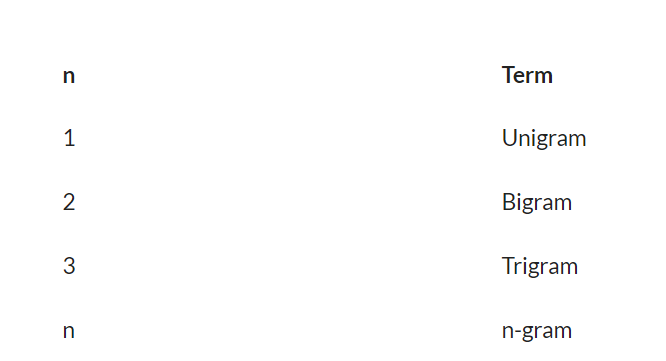

In [44]:
from collections import defaultdict

In [52]:
#get the count of every word in both the columns of df_train and df_test dataframes
hamValues=defaultdict(int)
spamValues=defaultdict(int)

In [58]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

##Unigram

In [ ]:
#get the count of every word in both the columns of dataSet dataframes where Category="ham"
for text in messages[messages.Category=='ham'].Message:
  for word in generate_N_grams(text):
    hamValues[word]+=1

In [ ]:
hamValues

In [ ]:
#get the count of every word in both the columns of dataSet dataframes where Category="Spam"
for text in messages[messages.Category=='spam'].Message:
  for word in generate_N_grams(text):
    spamValues[word]+=1

In [ ]:
spamValues

In [66]:
#sort in DO wrt 2nd column in each of hamValues,spamValues
df_Ham=pd.DataFrame(sorted(hamValues.items(),key=lambda x:x[1],reverse=True))
df_Spam=pd.DataFrame(sorted(spamValues.items(),key=lambda x:x[1],reverse=True))

In [69]:
pd1=df_Ham[0][:10]
pd2=df_Ham[1][:10]

In [70]:
ned1=df_Spam[0][:10]
ned2=df_Spam[1][:10]

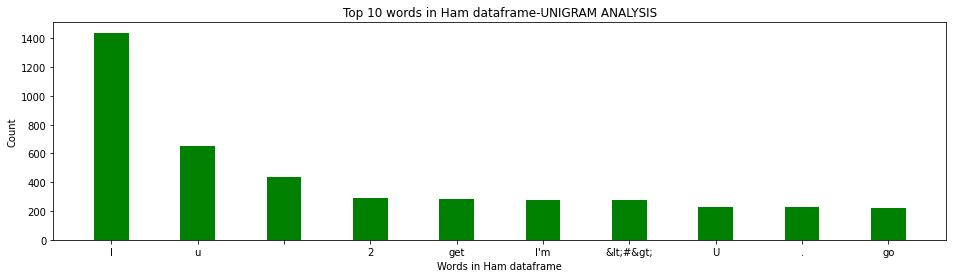

In [77]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in Ham dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Ham dataframe-UNIGRAM ANALYSIS")
plt.savefig("Ham-unigram.png")
plt.show()

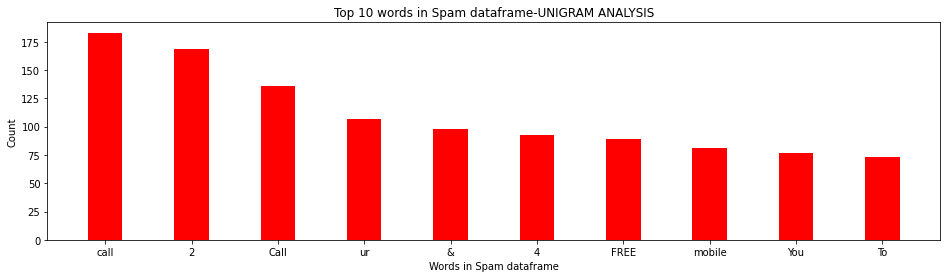

In [78]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in Spam dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Spam dataframe-UNIGRAM ANALYSIS")
plt.savefig("Spam-unigram.png")
plt.show()

#Bigram

In [89]:
#get the count of every word in both the columns of dataSet dataframes where Category="ham"
hamValues2=defaultdict(int)
spamValues2=defaultdict(int)

In [ ]:
#get the count of every word in both the columns of dataSet dataframes where Category="ham"
for text in messages[messages.Category=='ham'].Message:
  for word in generate_N_grams(text,2):
    hamValues2[word]+=1

In [ ]:
#get the count of every word in both the columns of dataSet dataframes where Category="Spam"
for text in messages[messages.Category=='spam'].Message:
  for word in generate_N_grams(text,2):
    spamValues2[word]+=1

In [92]:
#sort in DO wrt 2nd column in each of hamValues,spamValues
df_Ham2=pd.DataFrame(sorted(hamValues2.items(),key=lambda x:x[1],reverse=True))
df_Spam2=pd.DataFrame(sorted(spamValues2.items(),key=lambda x:x[1],reverse=True))

In [93]:
pd1BI=df_Ham2[0][:10]
pd2BI=df_Ham2[1][:10]

In [94]:
ned1BI=df_Spam2[0][:10]
ned2BI=df_Spam2[1][:10]

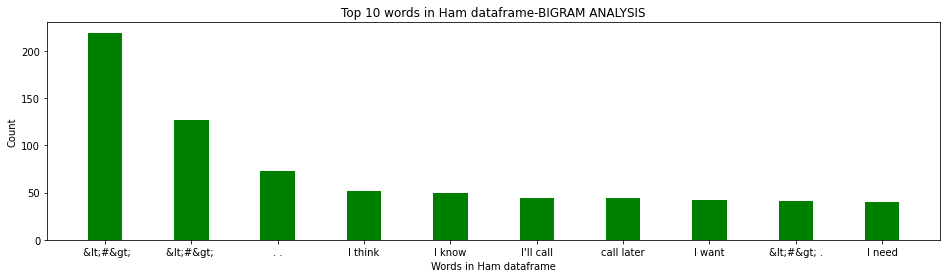

In [95]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1BI,pd2BI, color ='green',
        width = 0.4)
plt.xlabel("Words in Ham dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Ham dataframe-BIGRAM ANALYSIS")
plt.savefig("Ham-Bigram.png")
plt.show()

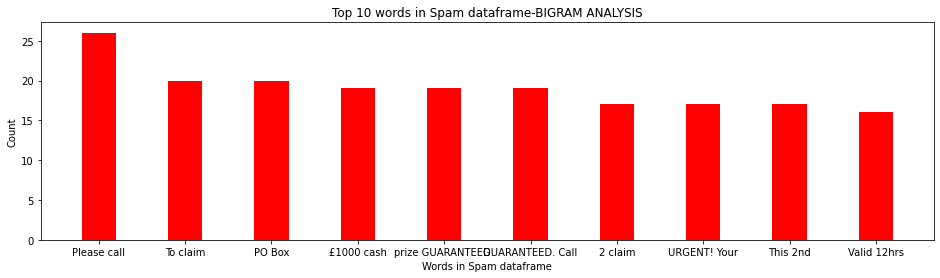

In [96]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1BI,ned2BI, color ='red',
        width = 0.4)
plt.xlabel("Words in Spam dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Spam dataframe-BIGRAM ANALYSIS")
plt.savefig("Spam-Bigram.png")
plt.show()

#Trigram

In [88]:
#get the count of every word in both the columns of dataSet dataframes where Category="ham"
hamValues3=defaultdict(int)
spamValues3=defaultdict(int)

In [ ]:
#get the count of every word in both the columns of dataSet dataframes where Category="ham"
for text in messages[messages.Category=='ham'].Message:
  for word in generate_N_grams(text,3):
    hamValues3[word]+=1

In [ ]:
#get the count of every word in both the columns of dataSet dataframes where Category="Spam"
for text in messages[messages.Category=='spam'].Message:
  for word in generate_N_grams(text,3):
    spamValues3[word]+=1

In [99]:
#sort in DO wrt 2nd column in each of hamValues,spamValues
df_Ham3=pd.DataFrame(sorted(hamValues3.items(),key=lambda x:x[1],reverse=True))
df_Spam3=pd.DataFrame(sorted(spamValues3.items(),key=lambda x:x[1],reverse=True))

In [100]:
pd1TRI=df_Ham3[0][:10]
pd2TRI=df_Ham3[1][:10]

In [101]:
ned1TRI=df_Spam3[0][:10]
ned2TRI=df_Spam3[1][:10]

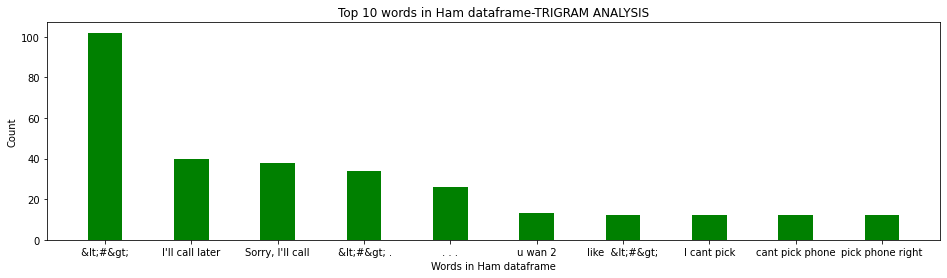

In [102]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1TRI,pd2TRI, color ='green',
        width = 0.4)
plt.xlabel("Words in Ham dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Ham dataframe-TRIGRAM ANALYSIS")
plt.savefig("Ham-Trigram.png")
plt.show()

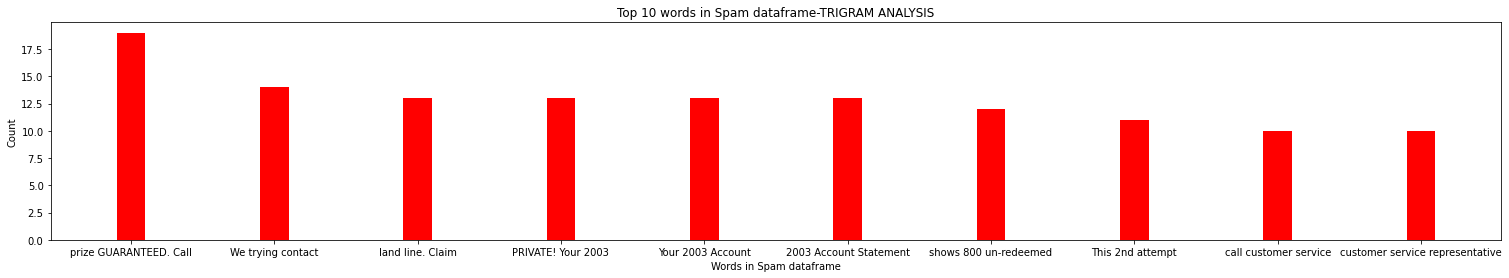

In [107]:
plt.figure(1,figsize=(26,4))
plt.bar(ned1TRI,ned2TRI, color ='red',
        width = 0.2)
plt.xlabel("Words in Spam dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Spam dataframe-TRIGRAM ANALYSIS")
plt.savefig("Spam-Trigram.png")
plt.show()

#Feature extraction

In [41]:
processed.values

array(['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
       'ok lar joke wif u oni',
       'free entri numbr wkli comp win fa cup final tkt numbrst may numbr text fa numbr receiv entri question std txt rate c appli numbrovernumbr',
       ..., 'piti mood suggest',
       'guy bitch act like interest buy someth els next week gave us free',
       'rofl true name'], dtype=object)